EPSG:4326


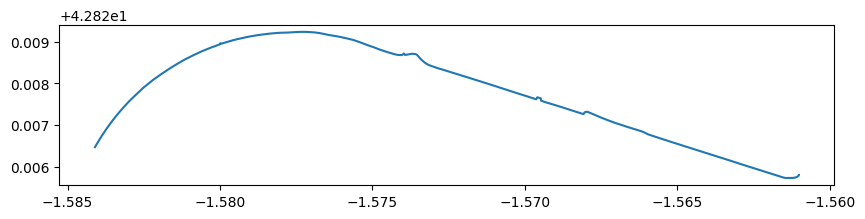

In [1]:
# Importa las bibliotecas necesarias
import geopandas as gpd
import matplotlib.pyplot as plt

shp_file = 'data/GIS_Arberoki2_and_lanes/N-150_Road_optical_fiber_layout_Arberoki_section.shp'

# Abre el archivo Shapefile
#gdf = gpd.read_file('data/GIS_Arberoki2_and_lanes/NA150 Eastbound lane.shp')
gdf = gpd.read_file(shp_file)

# Comprueba la proyección del archivo
print(gdf.crs)

# Si es necesario, puedes re-proyectar el GeoDataFrame a otra proyección
# gdf = gdf.to_crs('EPSG:4326')  # Convierte a WGS84 si es necesario

# Crea un gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Dibuja el archivo Shapefile en el gráfico
gdf.plot(ax=ax)

# Muestra el gráfico
plt.show()



In [2]:
# Importa las bibliotecas necesarias
import geopandas as gpd
import folium

# Abre el archivo Shapefile
gdf = gpd.read_file(shp_file)

# Comprueba la proyección del archivo
print(gdf.crs)

# Si es necesario, puedes re-proyectar el GeoDataFrame a WGS84
gdf = gdf.to_crs('EPSG:4326')

# Crea un mapa centrado en el centroide de tus datos
m = folium.Map(location=[gdf.unary_union.centroid.y, gdf.unary_union.centroid.x], zoom_start=16)

# Añade tus datos al mapa
folium.GeoJson(gdf).add_to(m)

# Muestra el mapa
m


EPSG:4326


In [3]:
import geopandas as gpd
from shapely.geometry import LineString

# Cargando el archivo .shp en un GeoDataFrame
gdf = gpd.read_file(shp_file)

# Cambiar el sistema de coordenadas a un CRS que mide en metros
gdf = gdf.to_crs('EPSG:25830')

# Obtener la geometría de la línea (en este caso, asumimos que solo hay una línea en el GeoDataFrame)
linea = gdf.geometry.iloc[0]

# Interpolar puntos cada 100 metros a lo largo de la línea
distancias = list(range(0, int(linea.length), 100))
puntos = [linea.interpolate(distancia) for distancia in distancias]

# Ahora, 'puntos' es una lista de objetos 'Point' a lo largo de la línea cada 100 metros
# Convierte la lista de puntos en un GeoDataFrame
gdf_puntos = gpd.GeoDataFrame(geometry=puntos, crs='EPSG:25830')

# Cambia el sistema de coordenadas de vuelta a WGS84
gdf_puntos = gdf_puntos.to_crs('EPSG:4326')

#print gdp_puntos gps coordinates
print(gdf_puntos)




                     geometry
0   POINT (-1.56101 42.82582)
1   POINT (-1.56213 42.82588)
2   POINT (-1.56330 42.82615)
3   POINT (-1.56447 42.82642)
4   POINT (-1.56563 42.82670)
5   POINT (-1.56679 42.82699)
6   POINT (-1.56793 42.82731)
7   POINT (-1.56907 42.82749)
8   POINT (-1.57013 42.82774)
9   POINT (-1.57130 42.82801)
10  POINT (-1.57247 42.82828)
11  POINT (-1.57353 42.82868)
12  POINT (-1.57468 42.82879)
13  POINT (-1.57583 42.82908)
14  POINT (-1.57704 42.82923)
15  POINT (-1.57826 42.82921)
16  POINT (-1.57946 42.82906)
17  POINT (-1.58060 42.82877)
18  POINT (-1.58168 42.82835)
19  POINT (-1.58265 42.82780)
20  POINT (-1.58348 42.82715)
